## Loading Images
As the first task of the assignment, the image dataset that is given will be imported. Then to maintain the consistency in data format, the images will be converted to grayscale images. The naming convention for data is one according to the file names and organized as a class for easy access. For the images used for edge detection they are stored in a list named edge where $i^{th}$ element is the image edge(i+1).png and index 0 contains edge.png. The same naming convention is followed for hough named images (hough.png etc.). But for them index 1 contains image 'hough2.png' and index 2 contains image 'hough3.png'.

In [1]:
import numpy as np
import matplotlib.image as mpimg
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import feature
class Dataset:
    ## The images are assumed as in the local directory,
    ## Change path names accordingly
    def __init__(self):
        ## Import images for part 1
        edge_image_names = ['edge1.png','edge2.png', 'edge3.png']
        self.edge_images = []
        for image_name in edge_image_names:
            image = mpimg.imread(image_name)
            self.edge_images.append(rgb2gray(image))
            print("Imported " + image_name + ": Original Dimesions " + str(image.shape))
        ## Import images for part 2
        hough_image_names = ['hough.png', 'hough2.png', 'hough3.png']
        self.hough_images = []
        for image_name in hough_image_names:
            image = mpimg.imread(image_name)
            self.hough_images.append(rgb2gray(image))
            print("Imported " + image_name + ": Original Dimensions " + str(image.shape))
        ## Import hough_result
        result_image_name = 'hough_reS.png'
        image = mpimg.imread(result_image_name)
        self.hough_result = (rgb2gray(image))
        print("Imported " + result_image_name + ": Original Dimensions " + str(image.shape))
        print("INFO: Dataset created")
    def get_edge_images(self):
        return self.edge_images
    def get_hough_images(self):
        return self.hough_images
    def get_hough_result(self):
        return self.hough_result
dataset = Dataset()

Imported edge1.png: Original Dimesions (699, 1010, 3)
Imported edge2.png: Original Dimesions (1122, 838, 4)
Imported edge3.png: Original Dimesions (211, 350, 3)
Imported hough.png: Original Dimensions (149, 277, 3)
Imported hough2.png: Original Dimensions (225, 225, 3)
Imported hough3.png: Original Dimensions (680, 626, 3)
Imported hough_reS.png: Original Dimensions (428, 593, 3)
INFO: Dataset created


## Part 1: Edge Detection
In this part of the notebook, the tasks involved with Edge Detection concept is given. The tasks and the concepts that they cover are as follows:
- ***Edge Detection with Sobel and Prewitt operators***
- ***Edge Detection with Canny Edge Detectors***

### Part 1.1: Edge Detection with Sobel and Prewitt Operators
In this part of the assignment, edge detetction using the sobel and prewitt operators are illustrated. For combining the vertical and horizontal edges the equation $\sqrt {G_x^2 + G_y^2}$ is used. Here $G_x$ is the result of applying the horizontal filter and $G_y$ is the result of applying the vertical filter. 

#### Applying Sobel Operators
Here, the horizontal and vertical Sobel operators are being applied by the following method and results are illustrated. The convolution operation is implemented as **sum(multiply(matrix1, matrix2))**. For the images that convolution cannot be applied, zero padding is used. When the images are being shown, the first column contains the grayscale image and the second column shows the image where sobel operator is applied.

In [2]:
def apply_sobel(image):
    sobel_horizontal = [
        [-1,-2,-1],
        [0, 0, 0],
        [1, 2, 1]
    ]
    sobel_vertical = [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]
    filter_dims = (3,3)
    vertical_edges = ndimage.filters.convolve(image, sobel_vertical)
    horizontal_edges = ndimage.filters.convolve(image, sobel_horizontal)
    sobel_res = np.sqrt(np.square(horizontal_edges) + np.square(vertical_edges))
    return (sobel_res,
           np.arctan2(vertical_edges, horizontal_edges), horizontal_edges, vertical_edges)

edge_images = dataset.get_edge_images()
sobel_results = (apply_sobel(edge_images[0]), apply_sobel(edge_images[1]), apply_sobel(edge_images[2]))

Text(0.5, 1.0, 'Vertical Edges Detected')

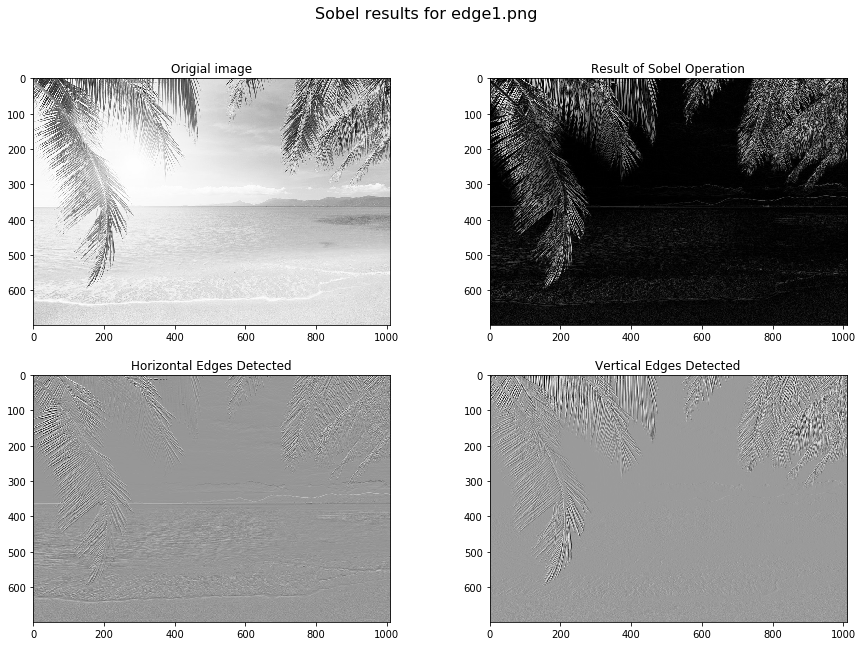

In [3]:
f, axes = plt.subplots(2,2, figsize = (15, 10))
f.suptitle("Sobel results for edge1.png", fontsize=16)
axes[0,0].imshow(edge_images[0], cmap='Greys_r')
axes[0,0].set_title("Origial image")
axes[0,1].imshow(sobel_results[0][0], cmap='Greys_r')
axes[0,1].set_title("Result of Sobel Operation")
axes[1,0].imshow(sobel_results[0][2], cmap='Greys_r')
axes[1,0].set_title("Horizontal Edges Detected")
axes[1,1].imshow(sobel_results[0][3], cmap='Greys_r')
axes[1,1].set_title("Vertical Edges Detected")

Text(0.5, 1.0, 'Vertical Edges Detected')

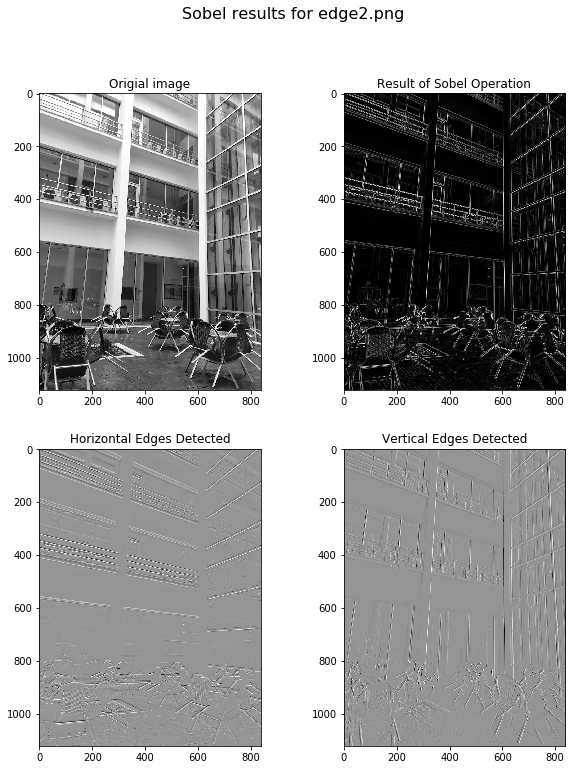

In [4]:
f, axes = plt.subplots(2,2, figsize = (10, 12))
f.suptitle("Sobel results for edge2.png", fontsize=16)
axes[0,0].imshow(edge_images[1], cmap='Greys_r')
axes[0,0].set_title("Origial image")
axes[0,1].imshow(sobel_results[1][0], cmap='Greys_r')
axes[0,1].set_title("Result of Sobel Operation")
axes[1,0].imshow(sobel_results[1][2], cmap='Greys_r')
axes[1,0].set_title("Horizontal Edges Detected")
axes[1,1].imshow(sobel_results[1][3], cmap='Greys_r')
axes[1,1].set_title("Vertical Edges Detected")

Text(0.5, 1.0, 'Vertical Edges Detected')

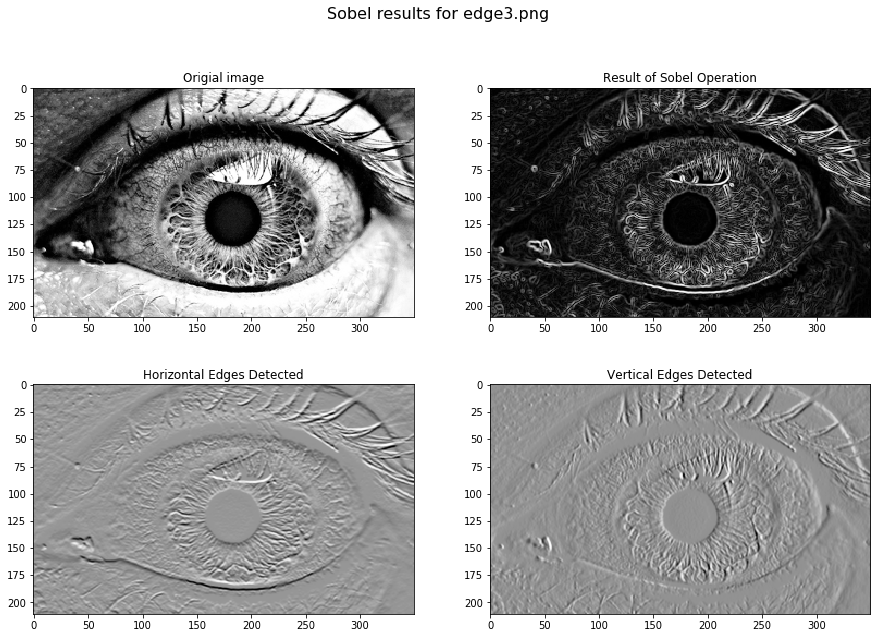

In [5]:
f, axes = plt.subplots(2,2, figsize = (15, 10))
f.suptitle("Sobel results for edge3.png", fontsize=16)
axes[0,0].imshow(edge_images[2], cmap='Greys_r')
axes[0,0].set_title("Origial image")
axes[0,1].imshow(sobel_results[2][0], cmap='Greys_r')
axes[0,1].set_title("Result of Sobel Operation")
axes[1,0].imshow(sobel_results[2][2], cmap='Greys_r')
axes[1,0].set_title("Horizontal Edges Detected")
axes[1,1].imshow(sobel_results[2][3], cmap='Greys_r')
axes[1,1].set_title("Vertical Edges Detected")

### Applying Prewitt Operators
Just like the same manner with the sobel operators, the prewitt operators are applied in the same manner. The method used for applying prewitt operators is given below as **apply_prewitt** which takes an image as input.

In [6]:
def apply_prewitt(image):
    prewitt_horizontal = [
        [-1,-1,-1],
        [0, 0, 0],
        [1, 1, 1]
    ]
    prewitt_vertical = [
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ]
    vertical_edges = ndimage.filters.convolve(image, prewitt_vertical)
    horizontal_edges = ndimage.filters.convolve(image, prewitt_horizontal)
    prewitt_res = np.sqrt(np.square(horizontal_edges) + np.square(vertical_edges))
    return (prewitt_res,
           np.arctan2(vertical_edges, horizontal_edges), horizontal_edges, vertical_edges)
edge_images = dataset.get_edge_images()
prewitt_results = (apply_prewitt(edge_images[0]), apply_prewitt(edge_images[1]), apply_prewitt(edge_images[2]))

Text(0.5, 1.0, 'Vertical Edges Detected')

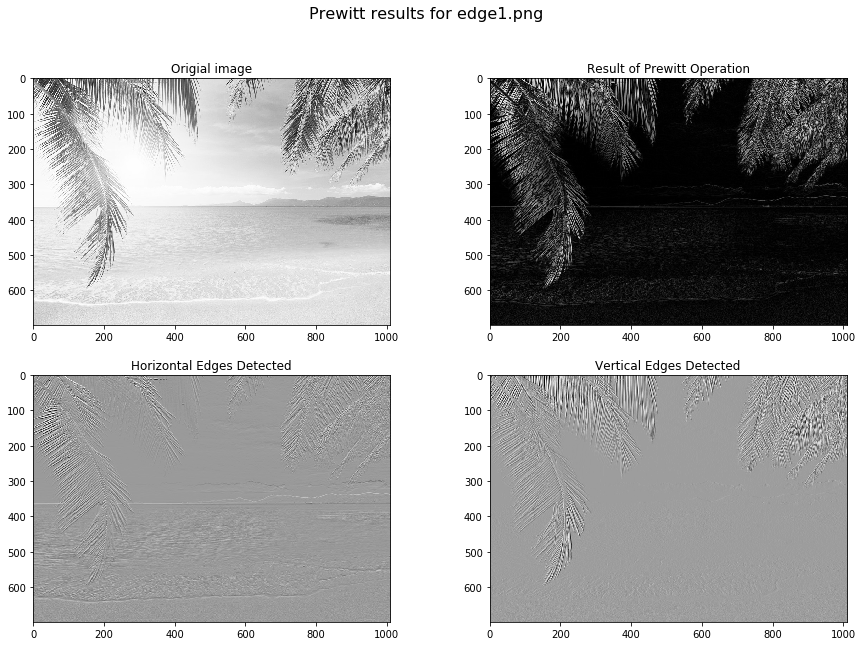

In [7]:
f, axes = plt.subplots(2,2, figsize = (15, 10))
f.suptitle("Prewitt results for edge1.png", fontsize=16)
axes[0,0].imshow(edge_images[0], cmap='Greys_r')
axes[0,0].set_title("Origial image")
axes[0,1].imshow(prewitt_results[0][0], cmap='Greys_r')
axes[0,1].set_title("Result of Prewitt Operation")
axes[1,0].imshow(prewitt_results[0][2], cmap='Greys_r')
axes[1,0].set_title("Horizontal Edges Detected")
axes[1,1].imshow(prewitt_results[0][3], cmap='Greys_r')
axes[1,1].set_title("Vertical Edges Detected")

Text(0.5, 1.0, 'Vertical Edges Detected')

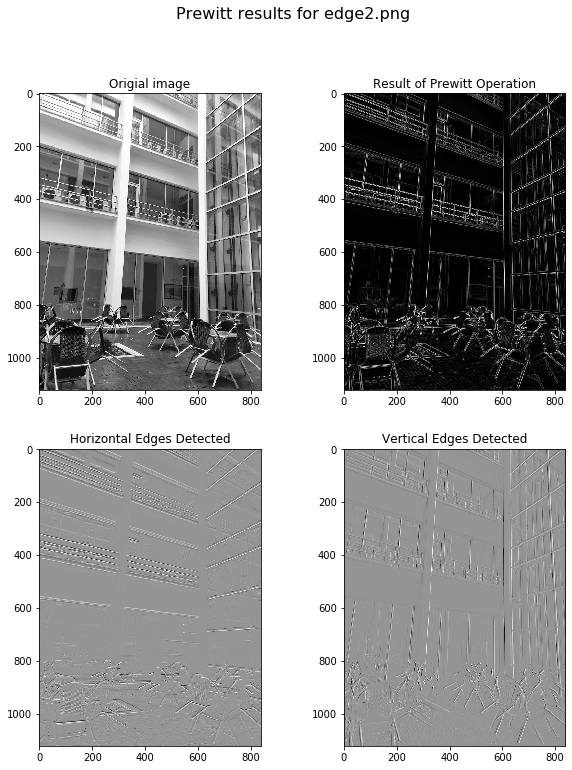

In [8]:
f, axes = plt.subplots(2,2, figsize = (10, 12))
f.suptitle("Prewitt results for edge2.png", fontsize=16)
axes[0,0].imshow(edge_images[1], cmap='Greys_r')
axes[0,0].set_title("Origial image")
axes[0,1].imshow(prewitt_results[1][0], cmap='Greys_r')
axes[0,1].set_title("Result of Prewitt Operation")
axes[1,0].imshow(prewitt_results[1][2], cmap='Greys_r')
axes[1,0].set_title("Horizontal Edges Detected")
axes[1,1].imshow(prewitt_results[1][3], cmap='Greys_r')
axes[1,1].set_title("Vertical Edges Detected")

Text(0.5, 1.0, 'Vertical Edges Detected')

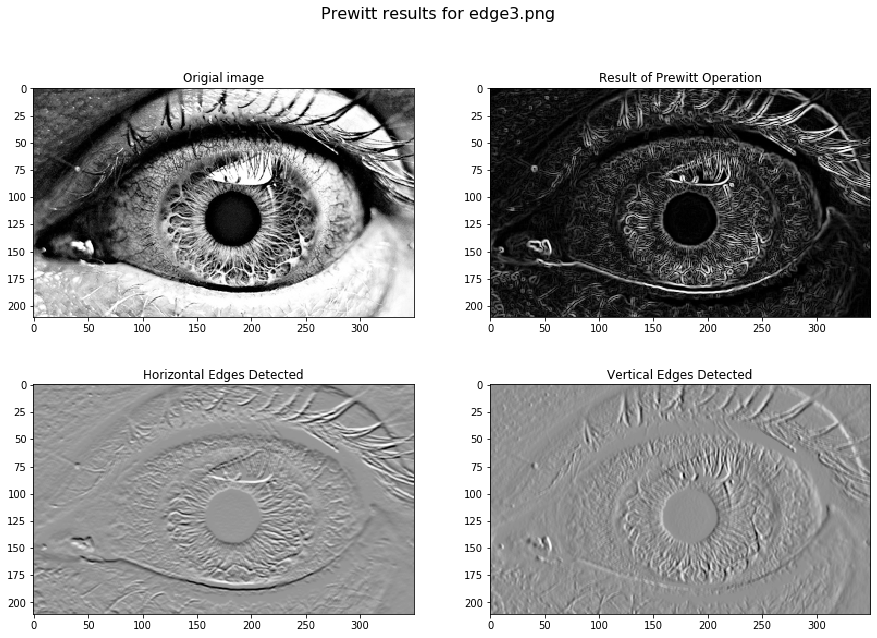

In [9]:
f, axes = plt.subplots(2,2, figsize = (15, 10))
f.suptitle("Prewitt results for edge3.png", fontsize=16)
axes[0,0].imshow(edge_images[2], cmap='Greys_r')
axes[0,0].set_title("Origial image")
axes[0,1].imshow(prewitt_results[2][0], cmap='Greys_r')
axes[0,1].set_title("Result of Prewitt Operation")
axes[1,0].imshow(prewitt_results[2][2], cmap='Greys_r')
axes[1,0].set_title("Horizontal Edges Detected")
axes[1,1].imshow(prewitt_results[2][3], cmap='Greys_r')
axes[1,1].set_title("Vertical Edges Detected")

### Part 1.2: Edge Detection with Canny Edge Detectors
For the Canny Edge Detection algorithm, the multi-step approach mentioned in the URL https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123 is followed. The steps of the algorithm is as follows:
- Noise Reduction
- Gradient Calculation
- Non-maximum Suppression
- Double Threshold
- Edge Tracking by Hysteresis
---
For the purposes of this question, the Canny Edge Detector function given in skimage.feature module is used

#### Parameter optimization for Image edge1.png

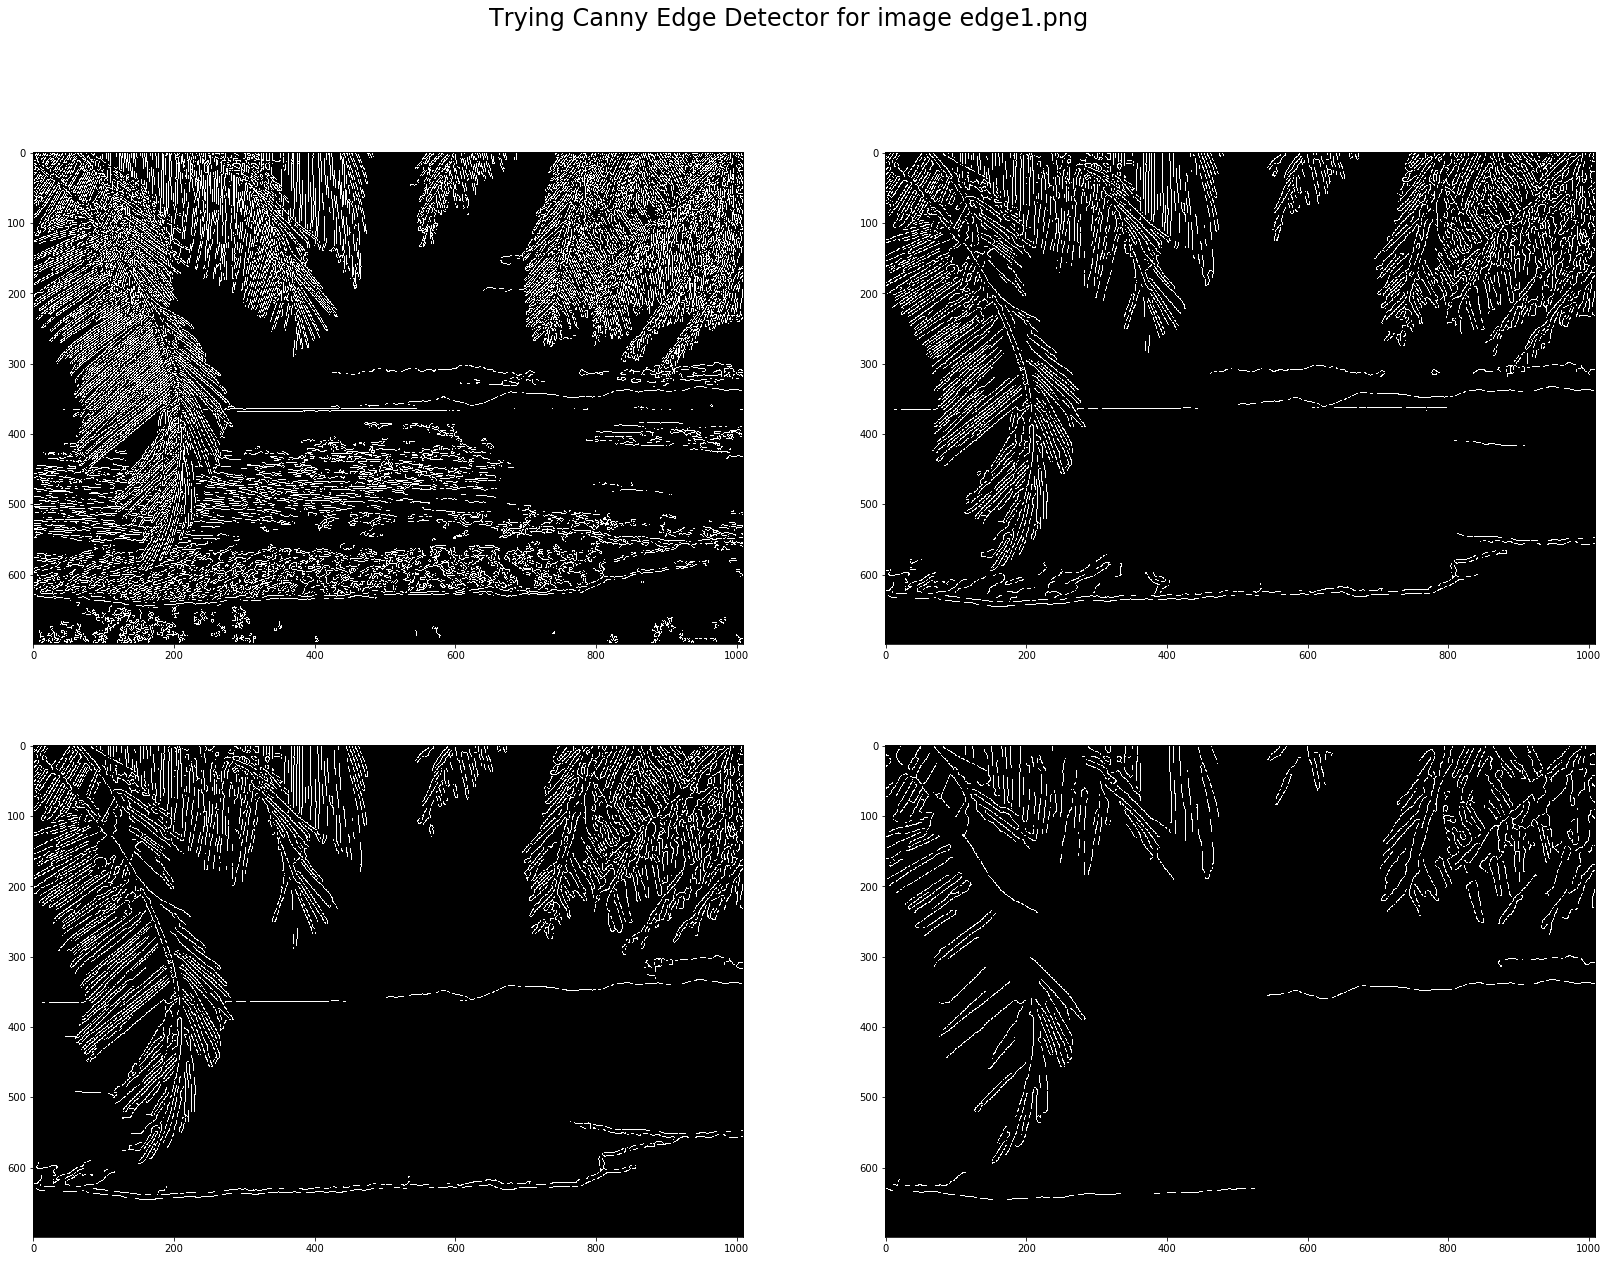

In [10]:
edge_images = dataset.get_edge_images()
fig, ax = plt.subplots(2,2, figsize=(28,20))
fig.suptitle("Trying Canny Edge Detector for image edge1.png", fontsize=24)
ax[0,0].imshow(feature.canny(edge_images[0], sigma = 1, low_threshold = 0.05, high_threshold = 0.15), cmap='Greys_r')
ax[0,1].imshow(feature.canny(edge_images[0], sigma = 2, low_threshold = 0.07, high_threshold = 0.15), cmap='Greys_r')
ax[1,0].imshow(feature.canny(edge_images[0], sigma = 2, low_threshold = 0.03, high_threshold = 0.2), cmap='Greys_r')
ax[1,1].imshow(feature.canny(edge_images[0], sigma = 3, low_threshold = 0.05, high_threshold = 0.2), cmap='Greys_r')

#### Parameter optimization for Image edge2.png

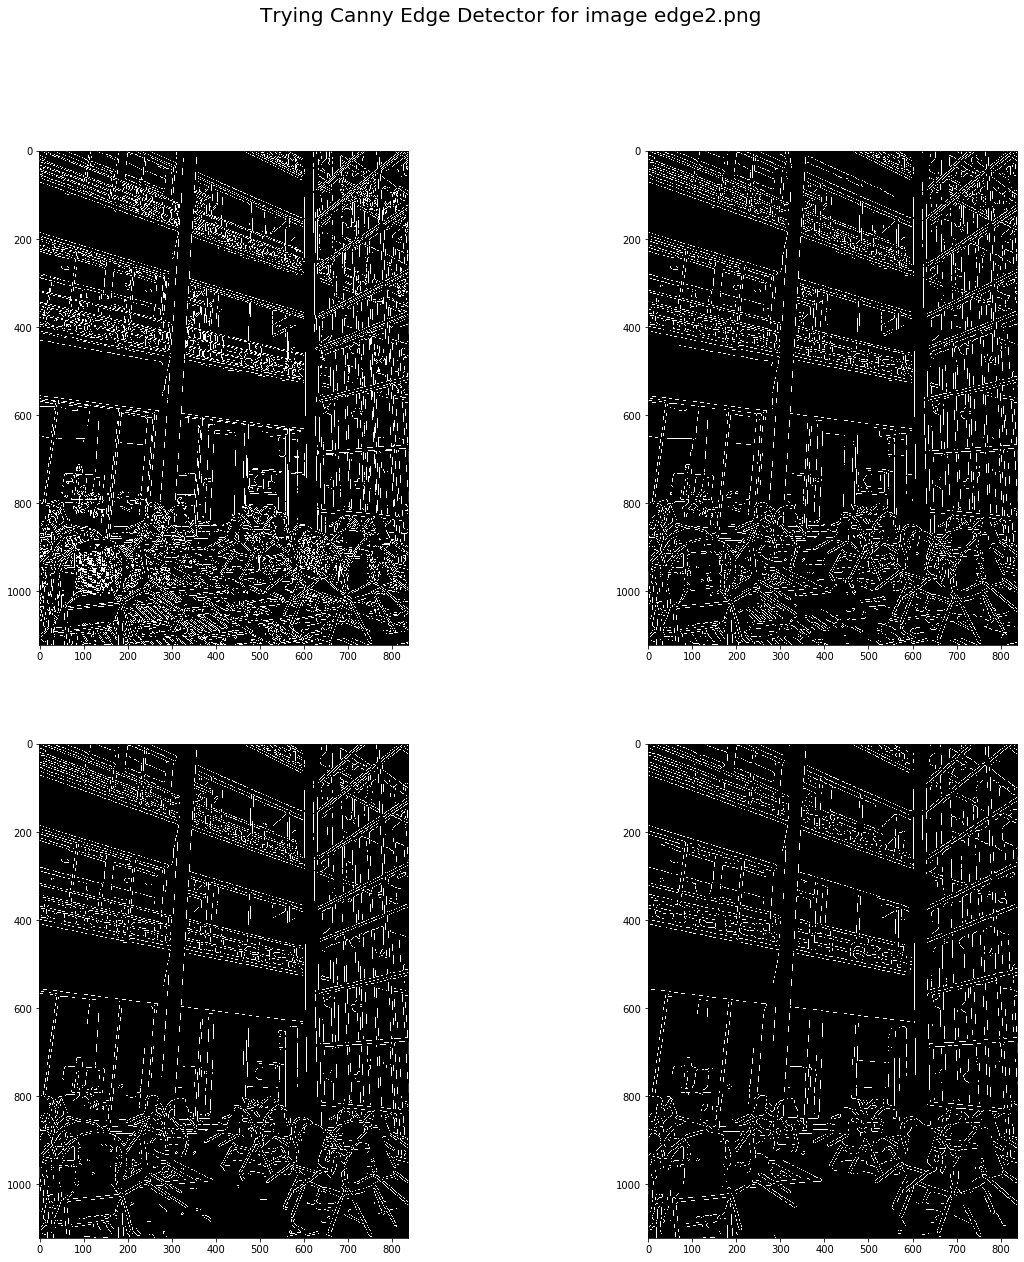

In [11]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
fig.suptitle("Trying Canny Edge Detector for image edge2.png", fontsize=20)
ax[0,0].imshow(feature.canny(edge_images[1], sigma = 1, low_threshold = 0.05, high_threshold = 0.15), cmap='Greys_r')
ax[0,1].imshow(feature.canny(edge_images[1], sigma = 2, low_threshold = 0.05, high_threshold = 0.09), cmap='Greys_r')
ax[1,0].imshow(feature.canny(edge_images[1], sigma = 2, low_threshold = 0.09, high_threshold = 0.15), cmap='Greys_r')
ax[1,1].imshow(feature.canny(edge_images[1], sigma = 3, low_threshold = 0.09, high_threshold = 0.11), cmap='Greys_r')

#### Parameter optimization for Image edge3.png

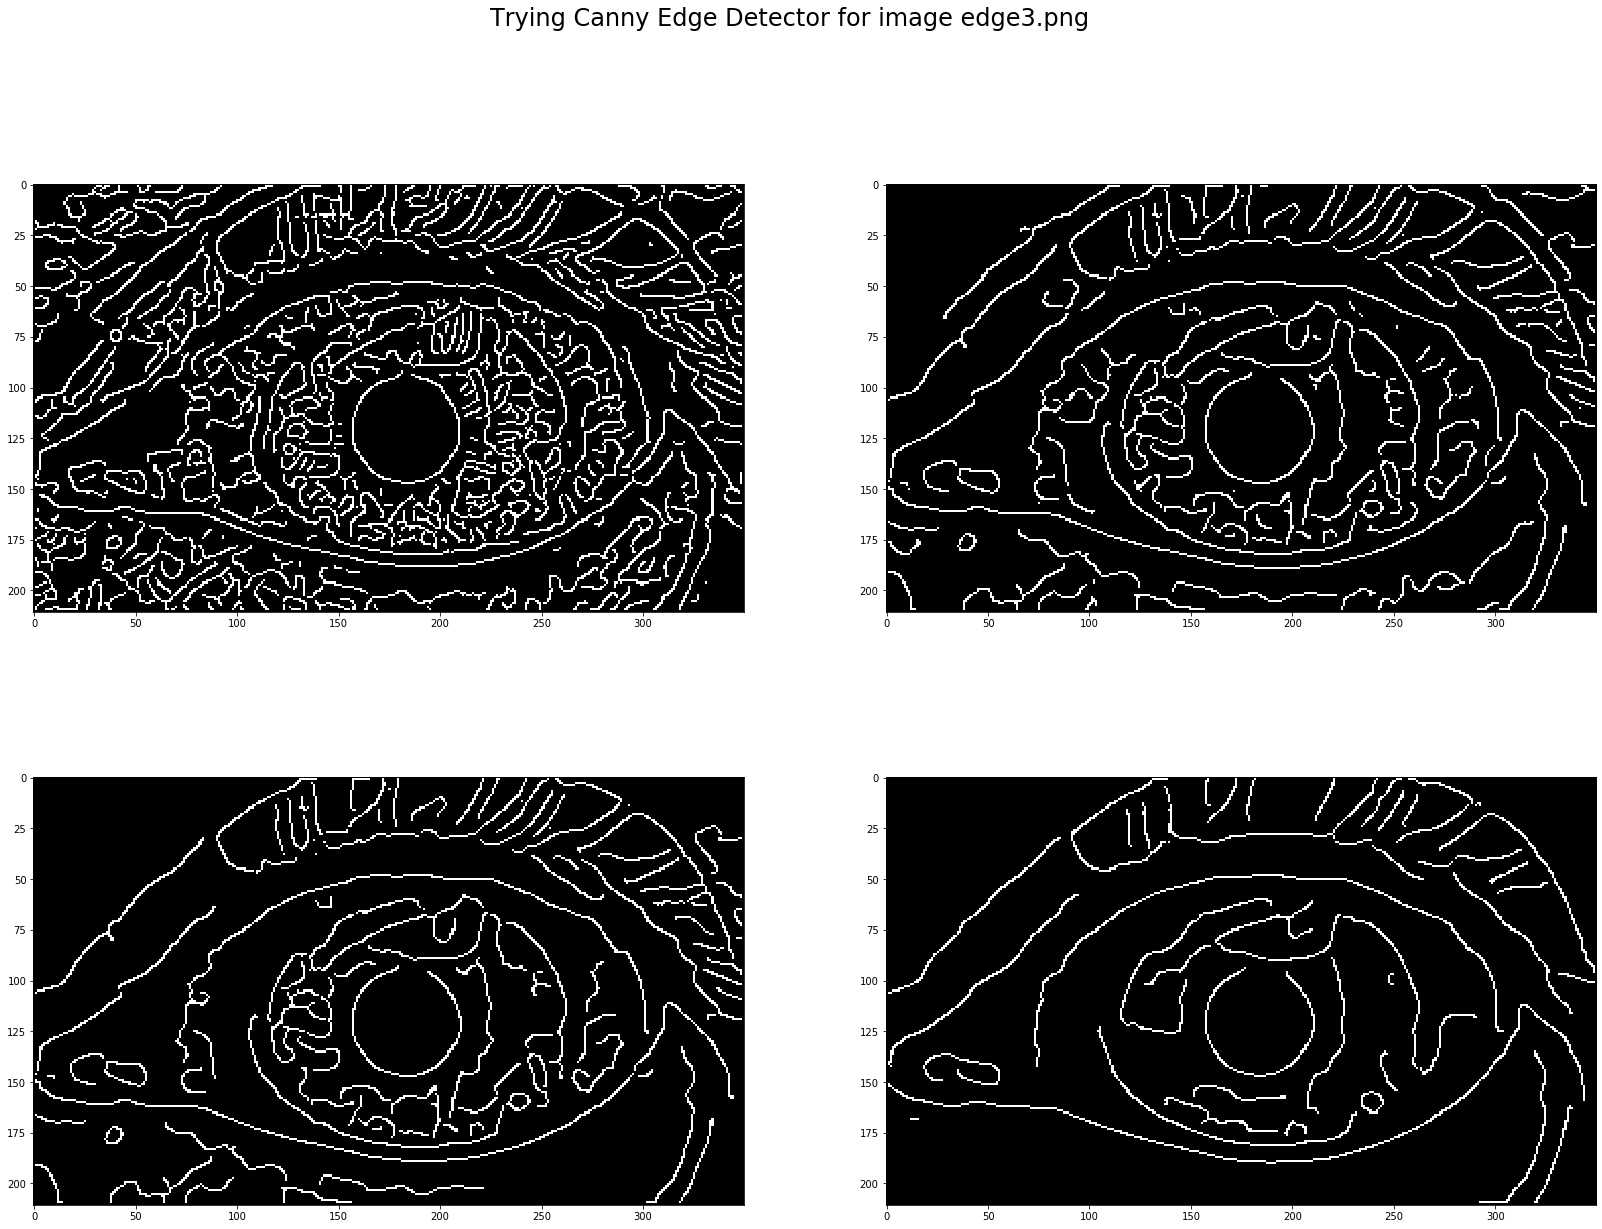

In [12]:
fig, ax = plt.subplots(2,2, figsize=(28,20))
fig.suptitle("Trying Canny Edge Detector for image edge3.png", fontsize=24)
ax[0,0].imshow(feature.canny(edge_images[2], sigma = 2, low_threshold = 0.05, high_threshold = 0.15), cmap='Greys_r')
ax[0,1].imshow(feature.canny(edge_images[2], sigma = 3, low_threshold = 0.05, high_threshold = 0.15), cmap='Greys_r')
ax[1,0].imshow(feature.canny(edge_images[2], sigma = 3, low_threshold = 0.05, high_threshold = 0.2), cmap='Greys_r')
ax[1,1].imshow(feature.canny(edge_images[2], sigma = 4, low_threshold = 0.03, high_threshold = 0.2), cmap='Greys_r')

## Part 2: Edge Linking with Hough Transform
In this part of the assignment, the edges in the images will be attempted to be linked with Hough Transform algorithm covered in the lectures. The function ***hough*** expects an image where edge detection is applied and then the algorithm links the edges accordingly. As the direction of line is not significant, using 180 values for theta is sufficient. Due to this fact, the range of thetas is (0,180). As an example for that, a line with theta value 270 and another with 90 will represent the lines only opposite in directions. 

In [13]:
## A binary image representing the edges is expected as input for the function
import math
def perform_hough(image):
    # Theta values in range (-90, 90)
    theta_values = np.arange(0,180)
    image_diagonal = int(np.ceil(np.sqrt(image.shape[0] ** 2 + image.shape[1] ** 2)))
    vote_grid = np.zeros((2 * image_diagonal, len(theta_values)))
    for x_idx in range(image.shape[0]):
        for y_idx in range(image.shape[1]):
            for theta in theta_values:
                if image[x_idx, y_idx] != 0:
                    d = x_idx * math.cos(math.radians(theta)) + y_idx * math.sin(math.radians(theta))
                    if d % 1 < 0.5:
                        d = int(d)
                    else:
                        d = int(d) + 1
                    vote_grid[int(d) + image_diagonal, theta] += 1
    return vote_grid

### Finding the best lines with a threshold
For finding the best lines, the lines are ordered w.r.t their votes. Then, the lines that has votes greater than or equal to the $i^{th}$ best vote are selected

In [14]:
def find_best_lines(votes, threshold):
    best_lines = []
    sorted_votes = np.sort(np.unique(votes))
    if threshold > sorted_votes.size:
        best_vote = sorted_votes[0]
    else:
        best_vote = sorted_votes[-threshold]
    diagonal = int(votes.shape[0] / 2)
    for x_idx in range(votes.shape[0]):
        for y_idx in range(votes.shape[1]):
            if votes[x_idx, y_idx] >= best_vote:
                theta = y_idx
                best_lines.append((x_idx - diagonal, theta))
    return best_lines

### Drawing the results for hough.png
As the first step for this part, the hough transform algorithm implemented has been tested with image hough.png. The results are drawn as the result of the next cell.

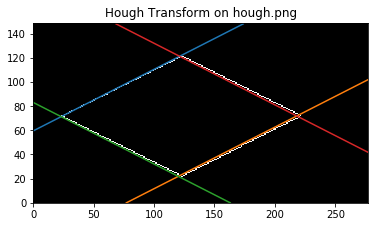

In [15]:
def draw_part_1():
    hough = dataset.get_hough_images()[0]
    edge_hough = feature.canny(hough, sigma = 1)
    accumulator = perform_hough(edge_hough)
    best_lines = find_best_lines(accumulator, 3)
    plt.imshow(hough, cmap = 'Greys_r')
    plt.xlim(0, hough.shape[1])
    plt.ylim(0, hough.shape[0])
    plt.title("Hough Transform on hough.png")
    x = np.array(range(hough.shape[0]))
    for line_idx in range(len(best_lines)):
        theta = math.radians(best_lines[line_idx][1])
        if math.sin(theta) != 0: 
            y = -math.cos(theta) / math.sin(theta) * x + (best_lines[line_idx][0] / math.sin(theta))
            plt.plot(y,x)
draw_part_1()

### Drawing results for hough3.png
As the second part of the assignment, the hough space and the resulting lines found for the hough transform are visualized with the corresponding figures. The hough space has been scaled for a clear view. 

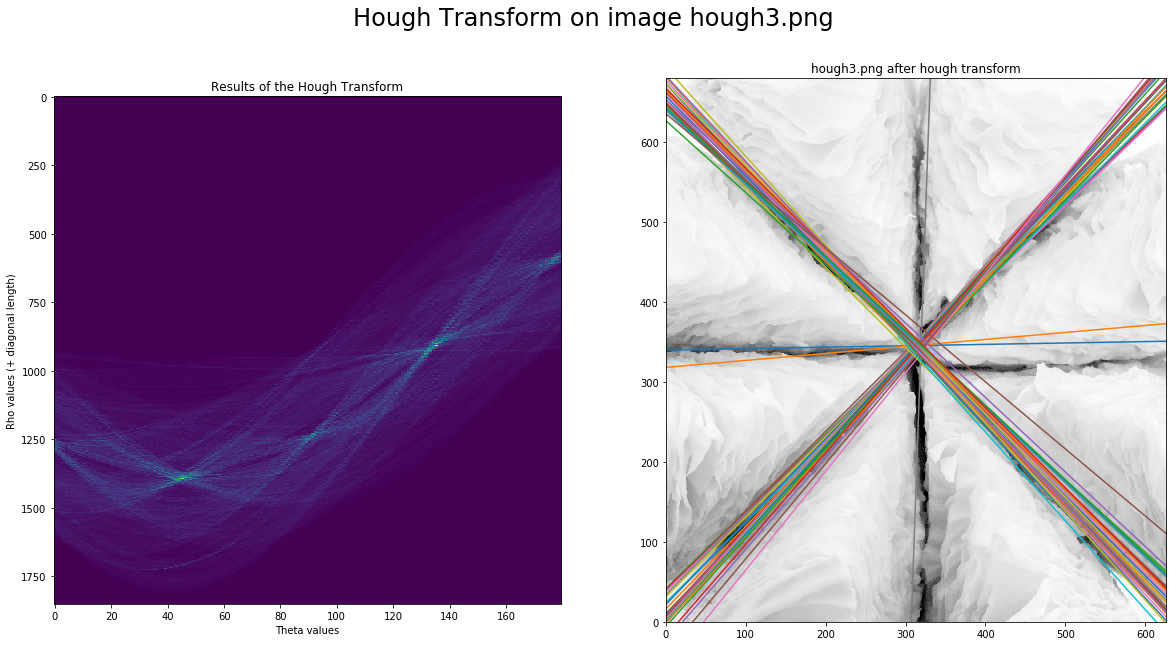

In [16]:
def find_lines_part_2_1():
    hough_2 = dataset.get_hough_images()[2]
    edge_hough = feature.canny(hough_2, sigma = 2)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
    fig.suptitle("Hough Transform on image hough3.png", fontsize = 24)
    accumulator = perform_hough(edge_hough)
    ax1.imshow(accumulator)
    ax1.set_aspect(accumulator.shape[1] / accumulator.shape[0])
    best_lines = find_best_lines(accumulator, 30)
    ax1.set_title('Results of the Hough Transform')
    ax1.set_xlabel("Theta values")
    ax1.set_ylabel("Rho values (+ diagonal length)")
    ax2.set_title("hough3.png after hough transform")
    ax2.set_xlim(0, hough_2.shape[1])
    ax2.set_ylim(0, hough_2.shape[0])
    ax2.imshow(hough_2, cmap = 'Greys_r', extent = [0, hough_2.shape[1], 0, hough_2.shape[0]])
    x = np.array(range(hough_2.shape[0]))
    for line_idx in range(len(best_lines)):
        theta = math.radians(best_lines[line_idx][1])
        if best_lines[line_idx][1] != 0:
            y = -math.cos(theta) / math.sin(theta) * x + (best_lines[line_idx][0] / math.sin(theta))
            ax2.plot(y,x)
        else:
            y = best_lines[line_idx][0] * np.ones(hough_2.shape[1])
            ax2.plot(np.array(range(hough_2.shape[1])),y)
find_lines_part_2_1()

### Hough Transform for edge1.png
As the final task for the assignment, Hough transform has been applied to the image edge1.png. Here the main task was finding the line on horizon. The corresponding line is shown on the image. The hough space is also shown. The figures are labeled accordingly.

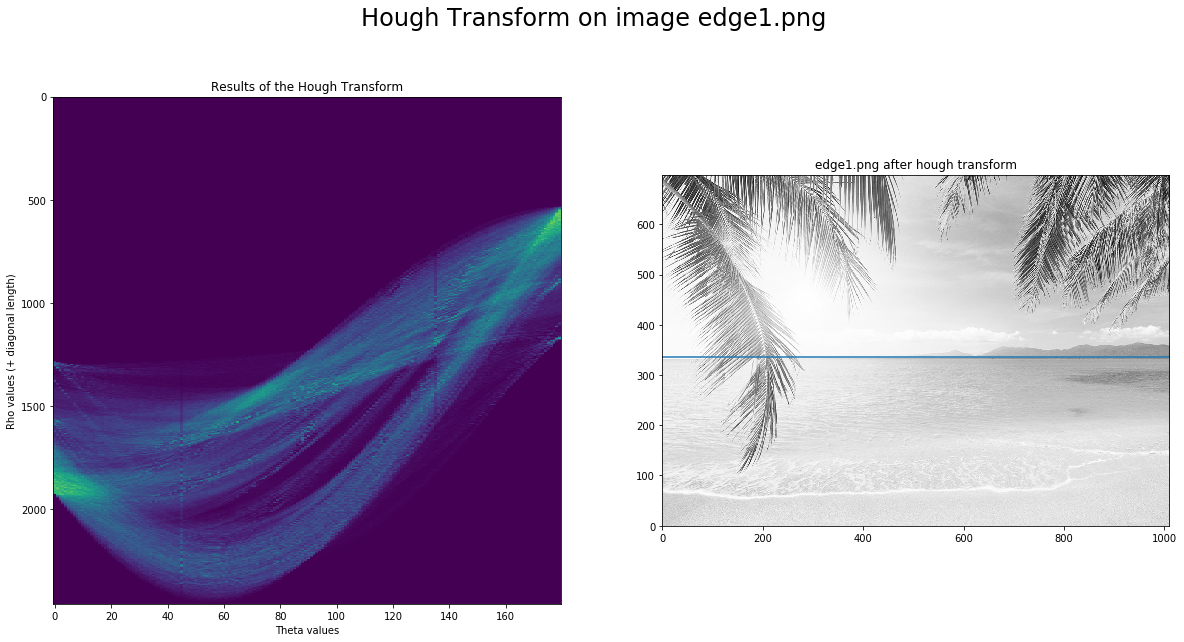

In [17]:
def find_lines_part_2_2():
    edge_1 = dataset.get_edge_images()[0]
    edge_1 = np.flipud(edge_1)
    edge_img = feature.canny(edge_1, sigma = 2)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
    fig.suptitle("Hough Transform on image edge1.png", fontsize = 24)
    accumulator = perform_hough(edge_img)
    ax1.imshow(accumulator)
    ax1.set_aspect(accumulator.shape[1] / accumulator.shape[0])
    ax1.set_title('Results of the Hough Transform')
    ax1.set_xlabel("Theta values")
    ax1.set_ylabel("Rho values (+ diagonal length)")
    ax2.set_title("edge1.png after hough transform")
    best_lines = find_best_lines(accumulator, 1)
    ax2.imshow(edge_1, cmap = 'Greys_r', origin = 'upper')
    ax2.set_xlim(0, edge_1.shape[1])
    ax2.set_ylim(0, edge_1.shape[0])
    x = np.array(range(edge_1.shape[0]))
    for line_idx in range(len(best_lines)):
        theta = math.radians(best_lines[line_idx][1])
        if math.sin(theta) != 0:
            y = -math.cos(theta) / math.sin(theta) * x + (best_lines[line_idx][0] / math.sin(theta))
            ax2.plot(y,x)
        else:
            # Simulating infinite slope
            y = best_lines[line_idx][0] * np.ones(edge_1.shape[1])
            ax2.plot(np.array(range(edge_1.shape[1])),y)
find_lines_part_2_2()